In [1]:
import random
import copy

import numpy as np

from numba import jit, njit, cuda

import matplotlib.pyplot as plt

# 1D Random Walker

In [349]:
steps = int(1e4)
x0 = 0

In [351]:
X = [x0]
T = [i for i in range(steps+1)]

In [352]:
x = copy.copy(x0)

for i in range(steps):
    
    rand = random.uniform(0, 1) - 0.5
    rand /= abs(rand)

    x += rand
    X.append(x)

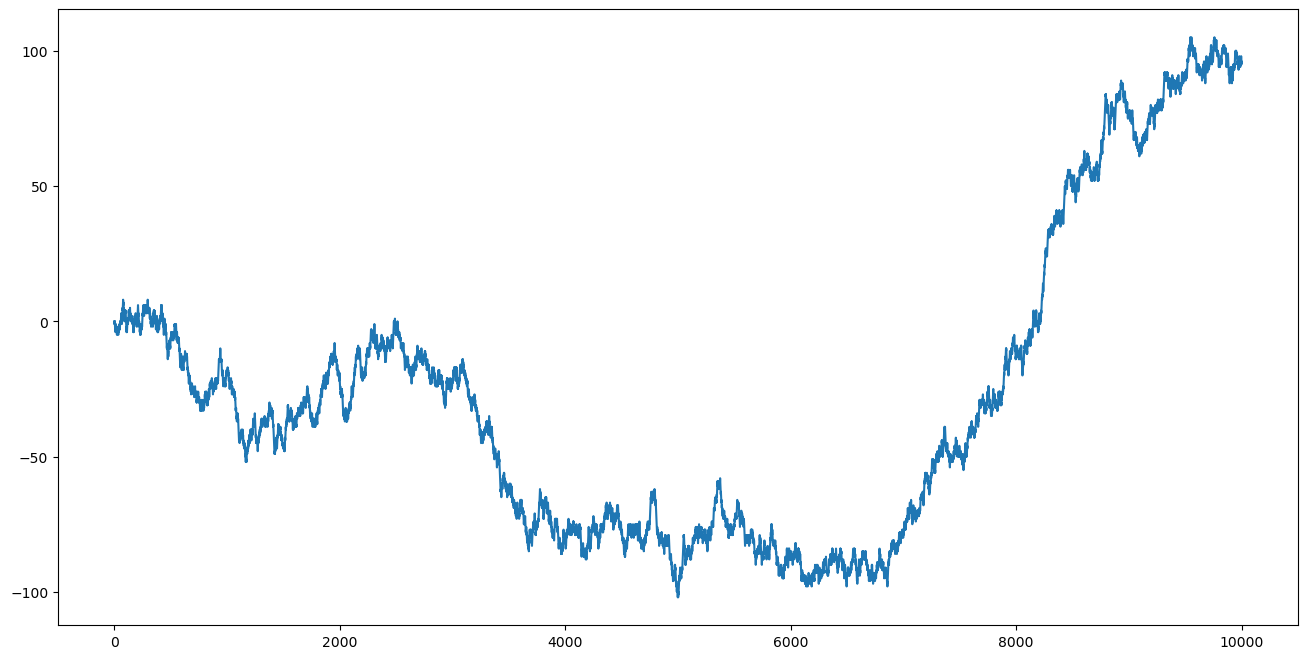

In [353]:
plt.figure(figsize=(16, 8))

plt.plot(T, X)

plt.show()

# 1D Random Walker with Numpy

In [357]:
generator = np.random.default_rng()
n_steps = int(1e8)
x0 = 0

In [359]:
steps = generator.random(n_steps) - 0.5
steps /= np.abs(steps)

In [361]:
T = np.arange(n_steps+1)
X = np.insert(np.cumsum(steps), 0, x0)

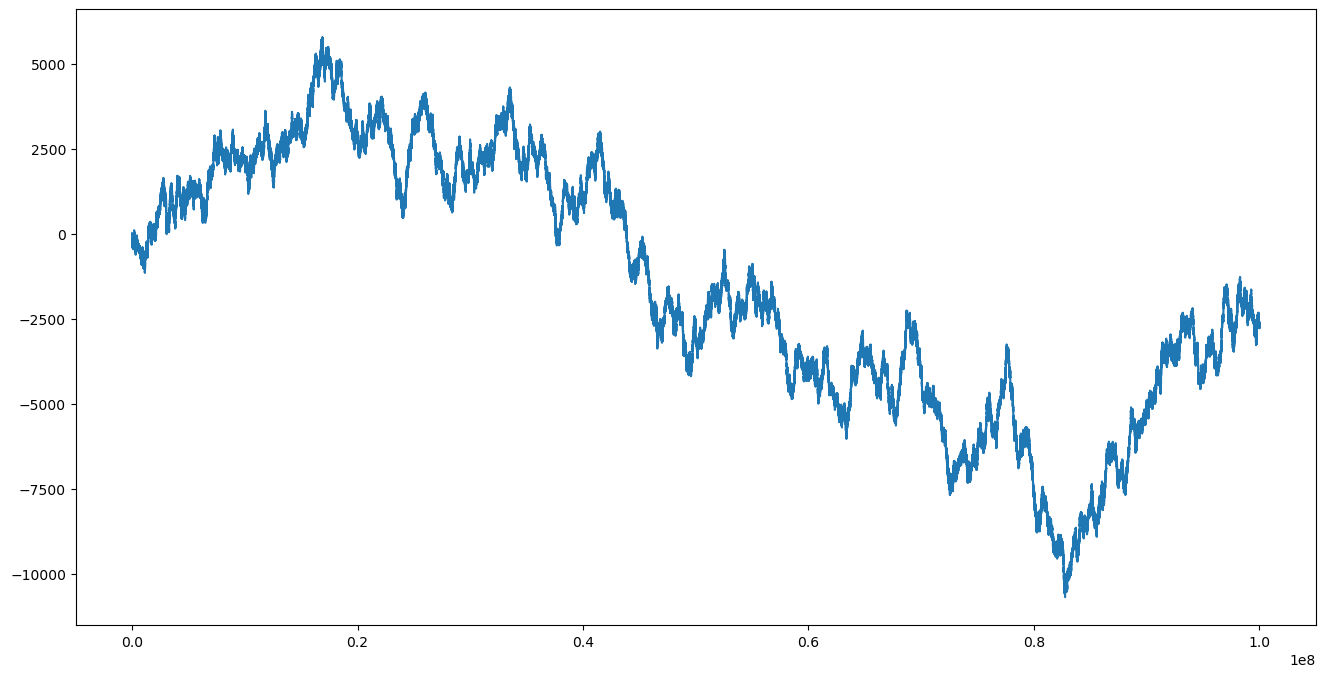

In [363]:
plt.figure(figsize=(16, 8))

plt.plot(T, X)

plt.show()

# 1D Random Walker with Numba

In [26]:
@jit(target_backend='cuda')
# You can use @jit or @njit
# For nvidia graphic cards you can use @jit(target_backend='cuda')
def random_walker(steps):

    steps = int(steps)
    x0 = 0
    
    X = [x0]*(steps+1)
    T = [i for i in range(steps + 1)]
    
    x = 1*x0
    for i in range(steps):
        
        rand = random.uniform(0, 1) - 0.5
        rand /= abs(rand)
        
        x += rand
        X[i+1] = x

    return X, T

In [28]:
X, T = random_walker(1e3)

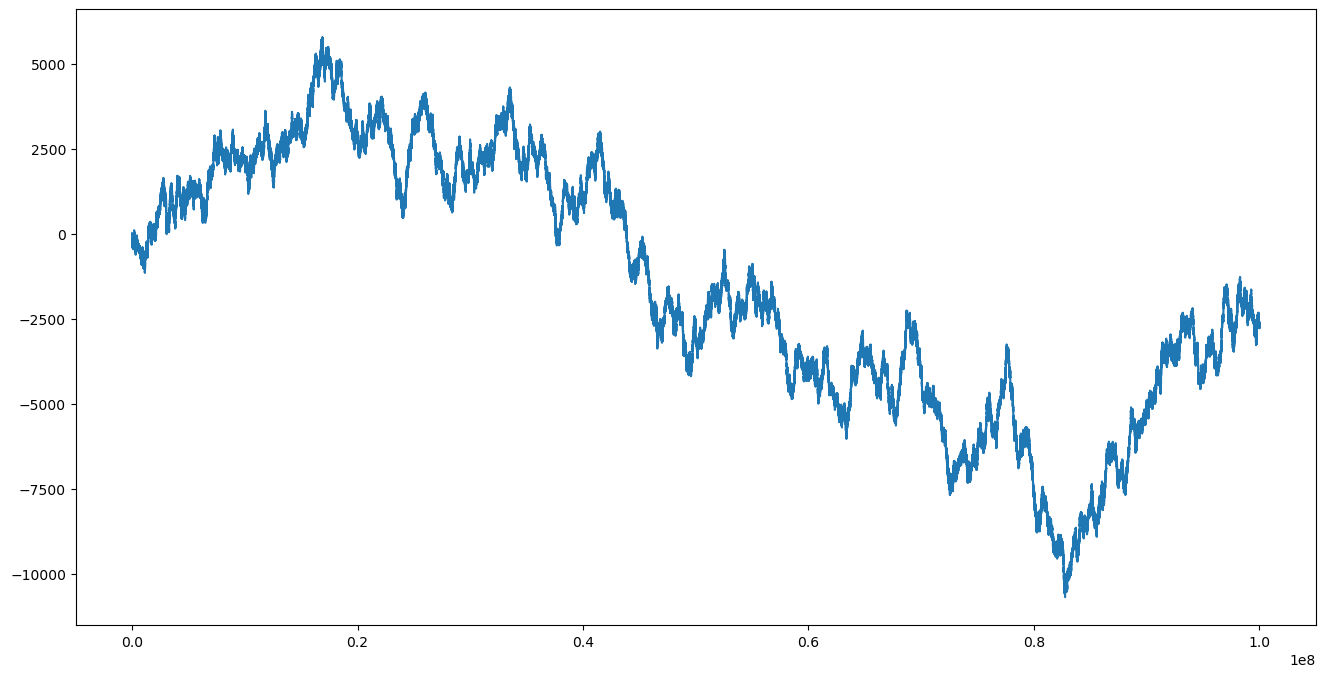

In [363]:
plt.figure(figsize=(16, 8))

plt.plot(T, X)

plt.show()